___References 
https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset

# Instructions

*  The class is divided into six (6) groups and each group will work on one dataset from the list below.
* Each group is required to apply a suitable neural network architecture to the dataset, depending on whether the problem is classification or regression.
* To improve the performance of the model, each group should select the most appropriate regularization techniques, such as L1, L2, Elastic Net, and dropout, and tune the hyperparameters (number of epochs, number of nodes, batch size, learning rate, etc).
* The type of regularization techniques applied, optimizers, and hyperparameter finetuning should all be taken into consideration when comparing the performance of the model.

In [ ]:
import numpy as np          #for array
import pandas as pd         #for data frame
import matplotlib.pyplot as plt    #for plot
import seaborn as sns               #for plot

# load a data

In [ ]:
data=pd.read_csv('../input/bank-marketing-dataset/bank.csv')

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# Univariate Variable Analysis

* numerical : age , balance, day, duration,campaign,pdays,previous
* cathegorical : job, marital, education, default, housing,loan,contact,day,month,duration ,poutcome ,deposit.

In [ ]:
#plot the cathegorical variable
#''' take a variable and retunme the histograme '''  
def bar_plot(variable):
    var =data[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(15,3))
    plt.bar(varValue.index, varValue,color=['#00008b','#00e5ee','#cd1076', '#008080','#cd5555','red','blue',])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    
    plt.show()
    print("{}: \n {}".format(variable,varValue))
    #print the detail of the variable

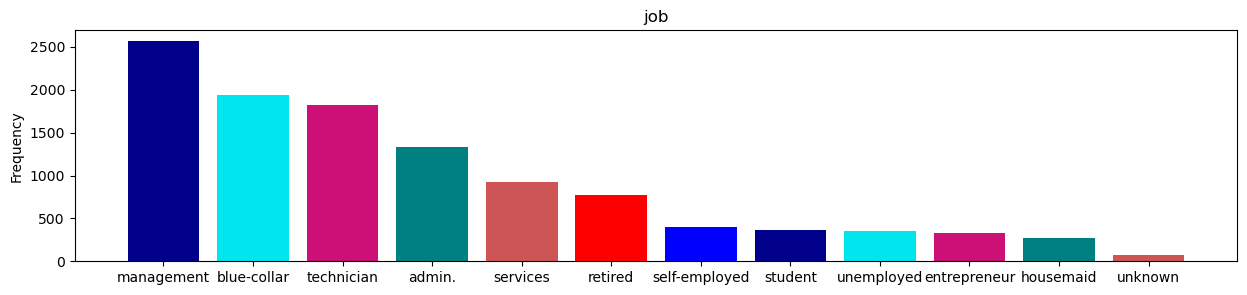

job: 
 management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


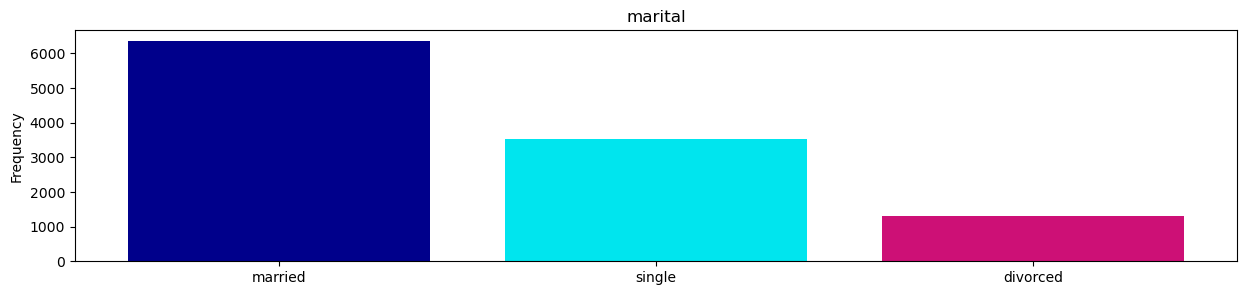

marital: 
 married     6351
single      3518
divorced    1293
Name: marital, dtype: int64


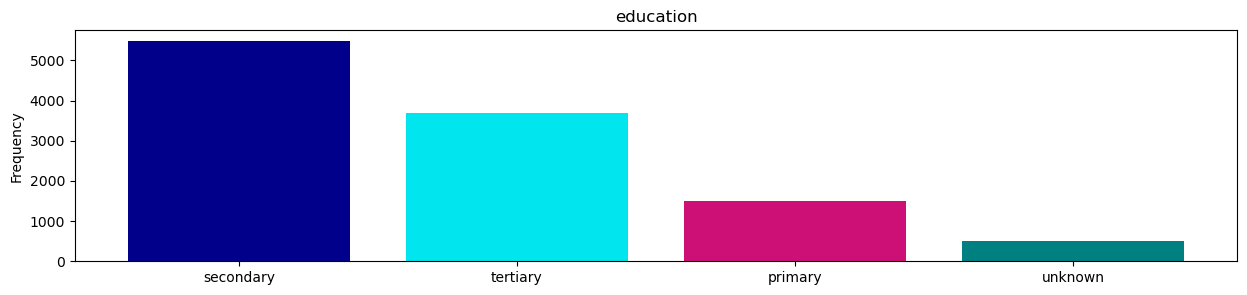

education: 
 secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64


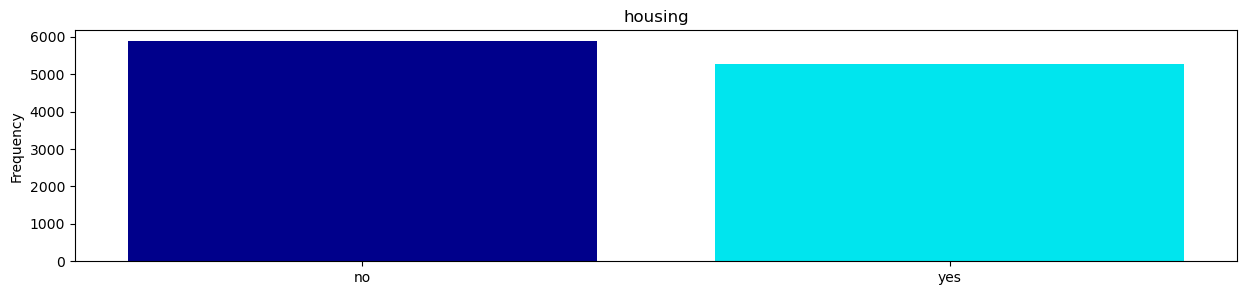

housing: 
 no     5881
yes    5281
Name: housing, dtype: int64


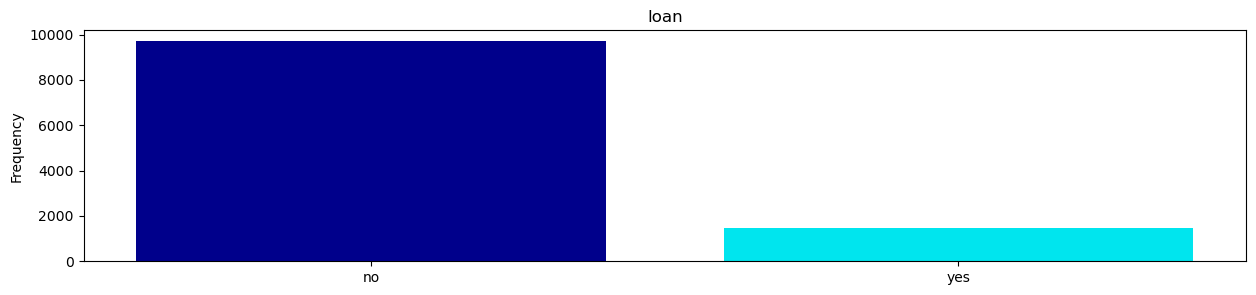

loan: 
 no     9702
yes    1460
Name: loan, dtype: int64


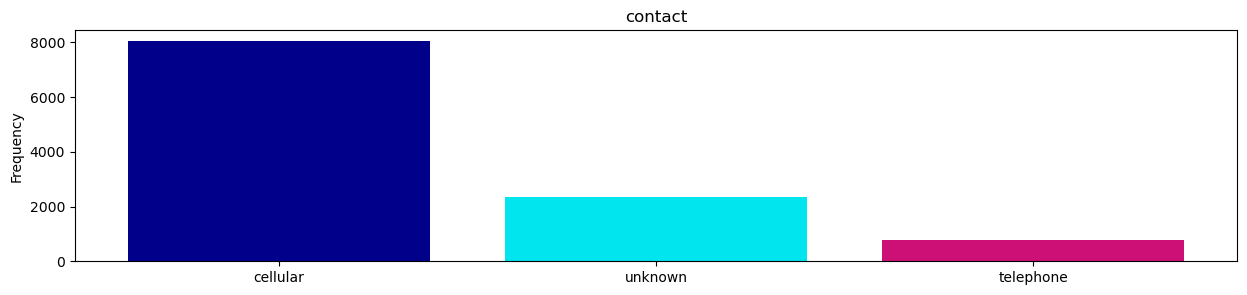

contact: 
 cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64


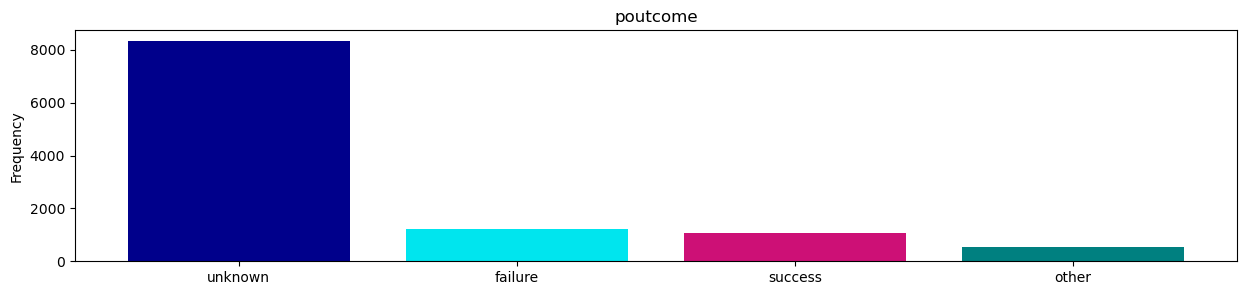

poutcome: 
 unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64


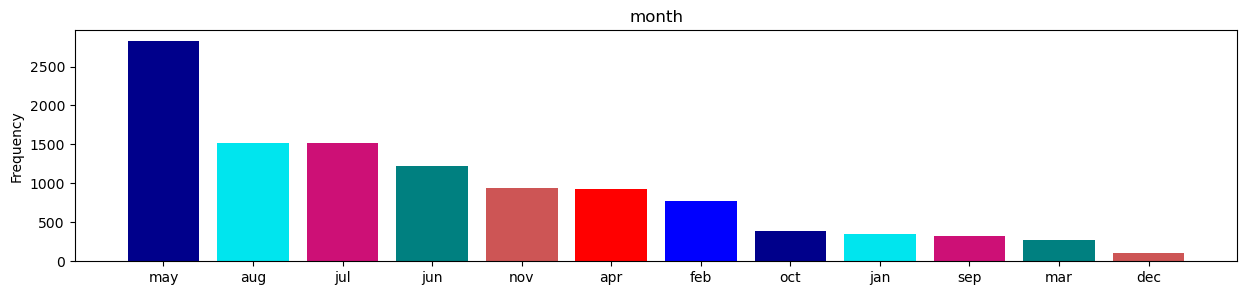

month: 
 may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64


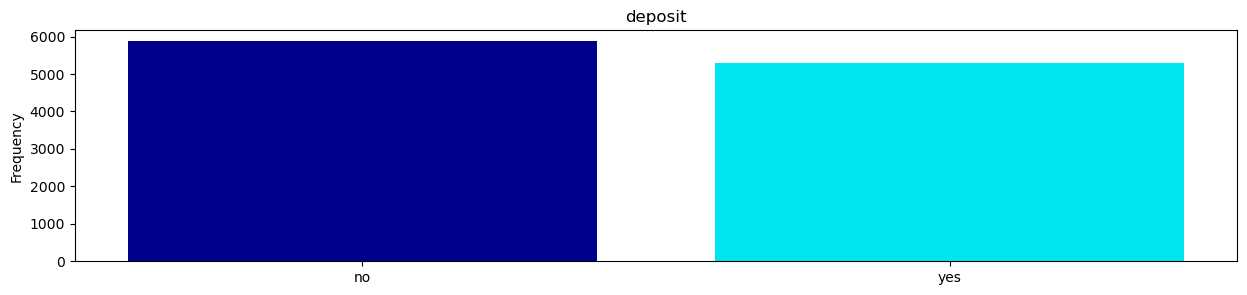

deposit: 
 no     5873
yes    5289
Name: deposit, dtype: int64


In [ ]:
categoryc = ["job","marital","education", "housing", "loan","contact","poutcome","month","deposit"]
for c in categoryc:
    bar_plot(c)

In [ ]:
#numerical
def plot_hist(variable):
    plt.figure(figsize=(9,6))
    plt.hist(data[variable], bins=40,color='#cd1076')
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.title("{} distrubition with hist".format(variable))
    plt.show()

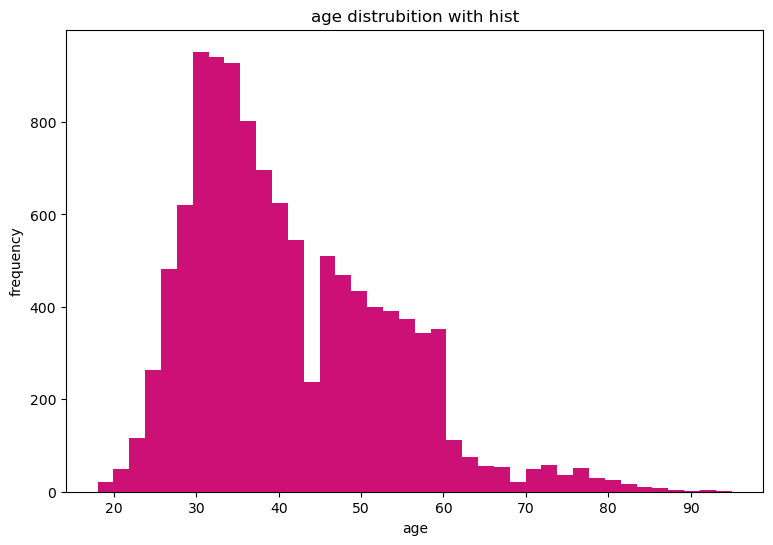

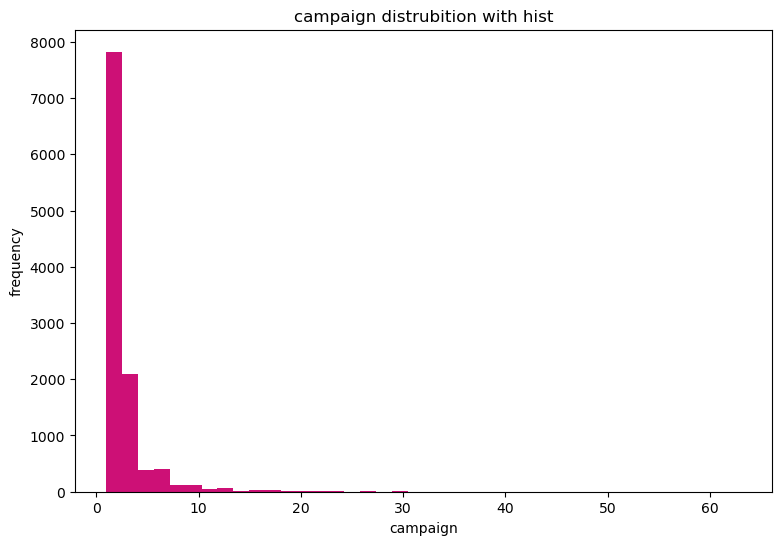

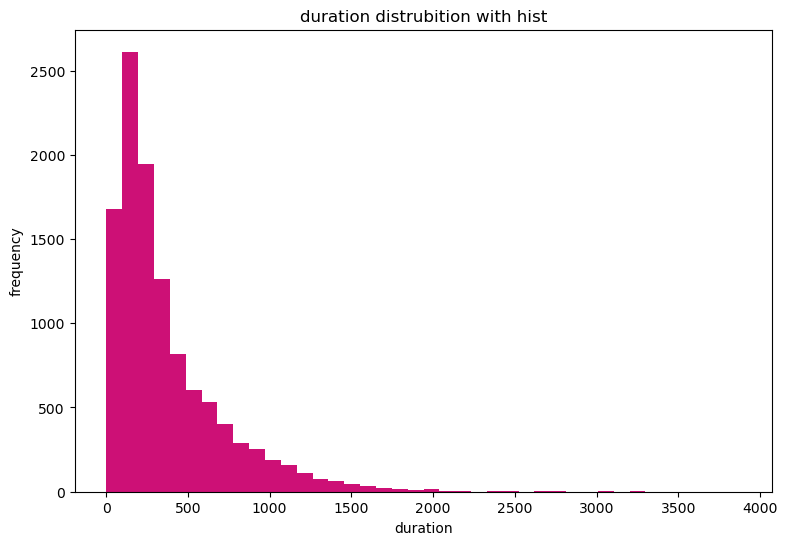

In [ ]:
numericVar = ["age","campaign","duration"]
for n in numericVar:
    plot_hist(n)

# missing value

In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

<AxesSubplot:>

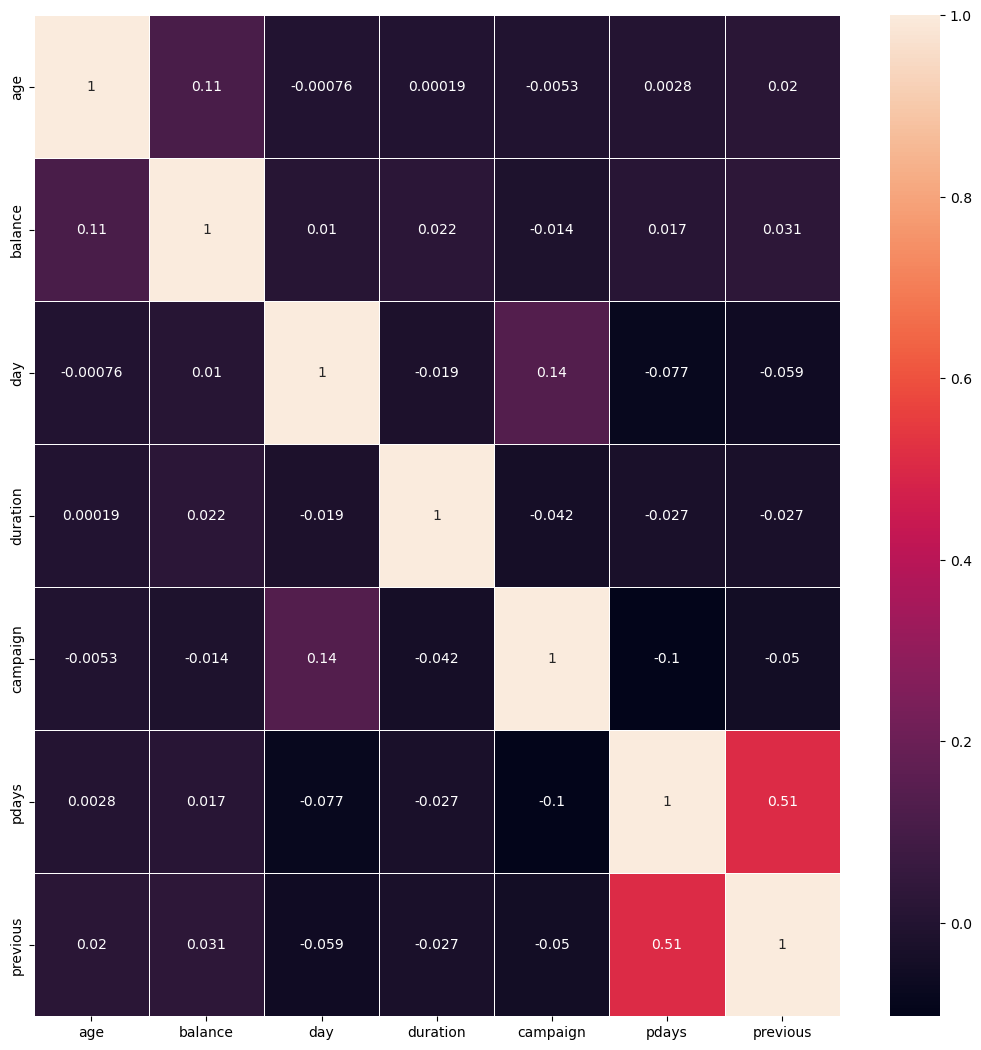

In [ ]:
fig, ax = plt.subplots(figsize=(13,13))         # Sample figsize in inches
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

In [ ]:
data=data.drop(['duration'],axis=1)

# One Hot encoding

### For encoding here we just use pandas built in function "get_dummies" to do the  one hot encoding 

In [ ]:
# separation of target from features
X = data.drop(['deposit'],axis=1)
y = data['deposit']
# do the encoding on the features 
X = pd.get_dummies(X, drop_first=True)
# change the target into numerical 1 for yes and 0 for no
y = np.where(data.deposit == "yes", 1, 0)
y.shape, X.shape

((11162,), (11162, 42))

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   balance              11162 non-null  int64
 2   day                  11162 non-null  int64
 3   campaign             11162 non-null  int64
 4   pdays                11162 non-null  int64
 5   previous             11162 non-null  int64
 6   job_blue-collar      11162 non-null  uint8
 7   job_entrepreneur     11162 non-null  uint8
 8   job_housemaid        11162 non-null  uint8
 9   job_management       11162 non-null  uint8
 10  job_retired          11162 non-null  uint8
 11  job_self-employed    11162 non-null  uint8
 12  job_services         11162 non-null  uint8
 13  job_student          11162 non-null  uint8
 14  job_technician       11162 non-null  uint8
 15  job_unemployed       11162 non-null  uint8
 16  job_unknown          1

# Split data

In [ ]:
from sklearn import model_selection
from sklearn import preprocessing
import keras
keras.__version__
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers, losses, metrics
import keras
from sklearn import preprocessing
from sklearn import model_selection

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                            y,test_size = 0.3, random_state = 1)

# data normalization

##  Here we use standarscaler method to normalize

In [ ]:
# using sckit learn method StandardScaler to normalize the features
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

number_of_class = 2
# change the target also into vector
y_train_categorical = keras.utils.to_categorical(y_train, number_of_class)
y_test_categorical = keras.utils.to_categorical(y_test, number_of_class )
y_test.shape,y_train.shape, X_test_std.shape, X_train_std.shape,y_test_categorical.shape

((3349,), (7813,), (3349, 42), (7813, 42), (3349, 2))

In [ ]:
#fix input size
input_size = X_train_std.shape[1]
input_size

42

# Model

original_model = models.Sequential()
original_model.add(layers.Dense(100, activation='relu', input_shape=(input_size,)))
original_model.add(layers.Dense(75, activation='relu'))
original_model.add(layers.Dense(2, activation='softmax'))

original_model.compile(optimizer='rmsprop',
                       loss=losses.categorical_crossentropy,
                       metrics=[metrics.categorical_accuracy])


Here we try to fit three models with different optimizer and the other parameter will be the same. 

In [ ]:
original_model = models.Sequential()
original_model.add(layers.Dense(100, activation='relu', input_shape=(input_size,)))
original_model.add(layers.Dense(75, activation='relu'))
original_model.add(layers.Dense(2, activation='softmax'))

original_model.compile(optimizer='rmsprop',
                       loss=losses.categorical_crossentropy,
                       metrics=[metrics.categorical_accuracy])

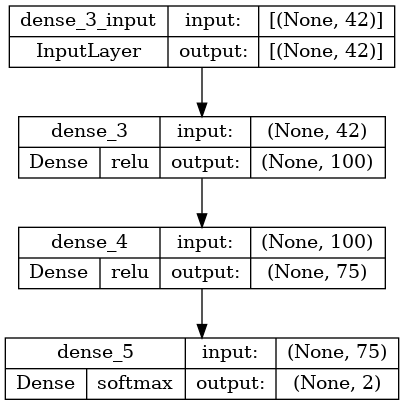

In [ ]:
keras.utils.plot_model(original_model, show_shapes=True, expand_nested=True,
    show_layer_activations=True,)

In [ ]:
original_hist = original_model.fit(X_train_std, y_train_categorical,
                                   epochs=10,
                                   batch_size=16,
                                   validation_data=(X_test_std, y_test_categorical))

Epoch 1/10
489/489 [==============================] - 2s 3ms/step - loss: 0.4406 - categorical_accuracy: 0.8021 - val_loss: 0.3942 - val_categorical_accuracy: 0.8334
Epoch 2/10
489/489 [==============================] - 1s 3ms/step - loss: 0.3687 - categorical_accuracy: 0.8421 - val_loss: 0.3687 - val_categorical_accuracy: 0.8394
Epoch 3/10
489/489 [==============================] - 1s 3ms/step - loss: 0.3470 - categorical_accuracy: 0.8558 - val_loss: 0.3685 - val_categorical_accuracy: 0.8429
Epoch 4/10
489/489 [==============================] - 1s 3ms/step - loss: 0.3329 - categorical_accuracy: 0.8609 - val_loss: 0.3635 - val_categorical_accuracy: 0.8465
Epoch 5/10
489/489 [==============================] - 1s 3ms/step - loss: 0.3216 - categorical_accuracy: 0.8673 - val_loss: 0.3652 - val_categorical_accuracy: 0.8453
Epoch 6/10
489/489 [==============================] - 1s 3ms/step - loss: 0.3091 - categorical_accuracy: 0.8710 - val_loss: 0.3630 - val_categorical_accuracy: 0.8486
Epoc

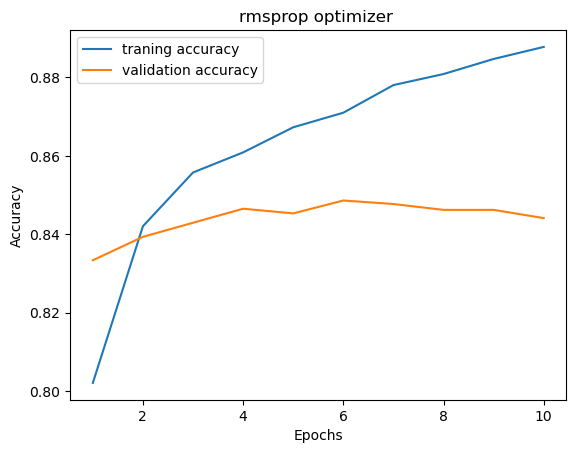

In [ ]:
epochs = range(1,11)

original_hist_acc = original_hist.history['categorical_accuracy']
original_hist_val = original_hist.history['val_categorical_accuracy']
plt.title('rmsprop optimizer ')
sns.lineplot(x=epochs, y=original_hist_acc, label='traning accuracy')
sns.lineplot(x=epochs, y=original_hist_val, label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
original_model = models.Sequential()
original_model.add(layers.Dense(100, activation='relu', input_shape=(input_size,)))
original_model.add(layers.Dense(75, activation='relu'))
original_model.add(layers.Dense(2, activation='softmax'))

original_model.compile(optimizer=optimizers.Adam(),
                       loss=losses.categorical_crossentropy,
                       metrics=[metrics.categorical_accuracy])
keras.utils.plot_model(original_model, show_shapes=True, expand_nested=True,
    show_layer_activations=True,)
original_hist = original_model.fit(X_train_std, y_train_categorical,
                                   epochs=10,
                                   batch_size=16,
                                   validation_data=(X_test_std, y_test_categorical))

Epoch 1/10
489/489 [==============================] - 2s 3ms/step - loss: 0.4380 - categorical_accuracy: 0.8053 - val_loss: 0.3688 - val_categorical_accuracy: 0.8394
Epoch 2/10
489/489 [==============================] - 1s 3ms/step - loss: 0.3645 - categorical_accuracy: 0.8455 - val_loss: 0.3567 - val_categorical_accuracy: 0.8495
Epoch 3/10
489/489 [==============================] - 1s 3ms/step - loss: 0.3424 - categorical_accuracy: 0.8601 - val_loss: 0.3576 - val_categorical_accuracy: 0.8432
Epoch 4/10
489/489 [==============================] - 1s 3ms/step - loss: 0.3273 - categorical_accuracy: 0.8624 - val_loss: 0.3592 - val_categorical_accuracy: 0.8423
Epoch 5/10
489/489 [==============================] - 1s 3ms/step - loss: 0.3123 - categorical_accuracy: 0.8712 - val_loss: 0.3631 - val_categorical_accuracy: 0.8432
Epoch 6/10
489/489 [==============================] - 1s 3ms/step - loss: 0.2998 - categorical_accuracy: 0.8730 - val_loss: 0.3669 - val_categorical_accuracy: 0.8420
Epoc

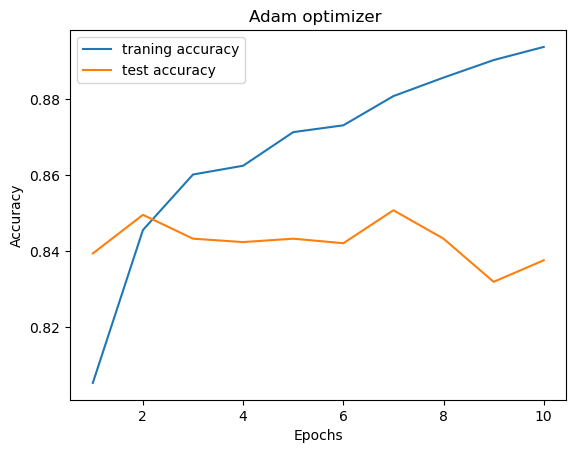

In [ ]:
epochs = range(1,11)

original_hist_acc = original_hist.history['categorical_accuracy']
original_hist_val = original_hist.history['val_categorical_accuracy']
plt.title('Adam optimizer ')
sns.lineplot(x=epochs, y=original_hist_acc, label='traning accuracy')
sns.lineplot(x=epochs, y=original_hist_val, label='test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
original_model = models.Sequential()
original_model.add(layers.Dense(100, activation='relu', input_shape=(input_size,)))
original_model.add(layers.Dense(75, activation='relu'))
original_model.add(layers.Dense(2, activation='softmax'))

original_model.compile(optimizer='sgd',
                       loss=losses.categorical_crossentropy,
                       metrics=[metrics.categorical_accuracy])
keras.utils.plot_model(original_model, show_shapes=True, expand_nested=True,
    show_layer_activations=True,)
original_hist = original_model.fit(X_train_std, y_train_categorical,
                                   epochs=10,
                                   batch_size=16,
                                   validation_data=(X_test_std, y_test_categorical))

Epoch 1/10
489/489 [==============================] - 2s 3ms/step - loss: 0.5631 - categorical_accuracy: 0.7141 - val_loss: 0.4612 - val_categorical_accuracy: 0.8029
Epoch 2/10
489/489 [==============================] - 1s 2ms/step - loss: 0.4332 - categorical_accuracy: 0.8097 - val_loss: 0.4134 - val_categorical_accuracy: 0.8131
Epoch 3/10
489/489 [==============================] - 1s 3ms/step - loss: 0.4025 - categorical_accuracy: 0.8299 - val_loss: 0.3961 - val_categorical_accuracy: 0.8250
Epoch 4/10
489/489 [==============================] - 1s 2ms/step - loss: 0.3861 - categorical_accuracy: 0.8398 - val_loss: 0.3884 - val_categorical_accuracy: 0.8274
Epoch 5/10
489/489 [==============================] - 1s 3ms/step - loss: 0.3748 - categorical_accuracy: 0.8449 - val_loss: 0.3816 - val_categorical_accuracy: 0.8370
Epoch 6/10
489/489 [==============================] - 1s 3ms/step - loss: 0.3650 - categorical_accuracy: 0.8474 - val_loss: 0.3744 - val_categorical_accuracy: 0.8391
Epoc

In [ ]:
original_hist.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

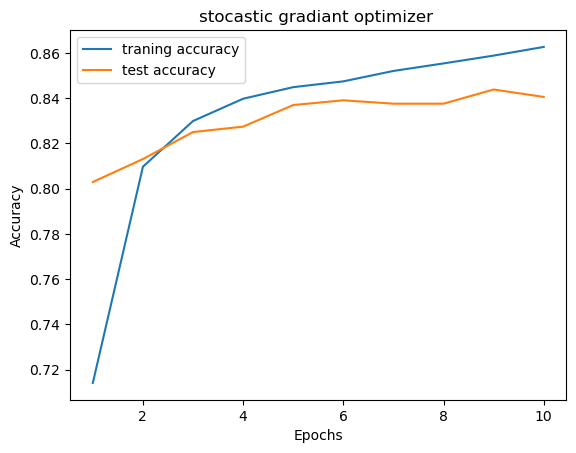

In [ ]:
epochs = range(1,11)

original_hist_acc = original_hist.history['categorical_accuracy']
original_hist_val = original_hist.history['val_categorical_accuracy']
plt.title('stocastic gradiant optimizer ')
sns.lineplot(x=epochs, y=original_hist_acc, label='traning accuracy')
sns.lineplot(x=epochs, y=original_hist_val, label='test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

rmspop
 loss: 0.2876 - categorical_accuracy: 0.8848 - val_loss: 0.3881 - val_categorical_accuracy: 0.8459
 
 Adam loss: 0.2544 - categorical_accuracy: 0.8940 - val_loss: 0.4112 - val_categorical_accuracy: 0.8262
 
 sgd loss: 0.3285 - categorical_accuracy: 0.8630 - val_loss: 0.3578 - val_categorical_accuracy: 0.8417


**We choose the model with optimiser stochastic gradiant descent because the training accuracy and the test accuracy is to close than the other optimizer**

# Let set the parameter to show that if the accuracy can be increase

##  let variate the epochs

In [ ]:
list_epoch = [5,20,50,100]

In [ ]:
for epoch in list_epoch:
    choice_model = models.Sequential()
    choice_model.add(layers.Dense(100, activation='relu', input_shape=(input_size,)))
    choice_model.add(layers.Dense(75, activation='relu'))
    choice_model.add(layers.Dense(2, activation='softmax'))

    choice_model.compile(optimizer='sgd',
                           loss=losses.categorical_crossentropy,
                           metrics=[metrics.categorical_accuracy])
    keras.utils.plot_model(choice_model, show_shapes=True, expand_nested=True,
        show_layer_activations=True,)
    choose_hist = choice_model.fit(X_train_std, y_train_categorical,
                                       epochs=epoch,
                                       batch_size=16,
                                       validation_data=(X_test_std, y_test_categorical))
    
    
    print("\n\n\n")

Epoch 1/5
489/489 [==============================] - 2s 3ms/step - loss: 0.6190 - categorical_accuracy: 0.6549 - val_loss: 0.5848 - val_categorical_accuracy: 0.6898
Epoch 2/5
489/489 [==============================] - 1s 2ms/step - loss: 0.5772 - categorical_accuracy: 0.7034 - val_loss: 0.5772 - val_categorical_accuracy: 0.6987
Epoch 3/5
489/489 [==============================] - 1s 2ms/step - loss: 0.5659 - categorical_accuracy: 0.7145 - val_loss: 0.5676 - val_categorical_accuracy: 0.7071
Epoch 4/5
489/489 [==============================] - 1s 2ms/step - loss: 0.5580 - categorical_accuracy: 0.7215 - val_loss: 0.5658 - val_categorical_accuracy: 0.7107
Epoch 5/5
489/489 [==============================] - 1s 2ms/step - loss: 0.5512 - categorical_accuracy: 0.7266 - val_loss: 0.5687 - val_categorical_accuracy: 0.7086




Epoch 1/20
489/489 [==============================] - 2s 3ms/step - loss: 0.6379 - categorical_accuracy: 0.6418 - val_loss: 0.5908 - val_categorical_accuracy: 0.6853
Epoch

 According to the accuracy  10 epochs is better

# let variate the batch size

In [ ]:
batch_sizes = [200, 512, 800]
for batch_size in batch_sizes:
    choice_model = models.Sequential()
    choice_model.add(layers.Dense(100, activation='relu', input_shape=(input_size,)))
    choice_model.add(layers.Dense(75, activation='relu'))
    choice_model.add(layers.Dense(2, activation='softmax'))

    choice_model.compile(optimizer='sgd',
                           loss=losses.categorical_crossentropy,
                           metrics=[metrics.categorical_accuracy])
    keras.utils.plot_model(choice_model, show_shapes=True, expand_nested=True,
        show_layer_activations=True,)
    choose_hist = choice_model.fit(X_train_std, y_train_categorical,
                                       epochs=10,
                                       batch_size=batch_size,
                                       validation_data=(X_test_std, y_test_categorical))
    
    
    print("\n\n\n")
losses.categorical_hinge

Epoch 1/10
40/40 [==============================] - 1s 8ms/step - loss: 0.7168 - categorical_accuracy: 0.5766 - val_loss: 0.6471 - val_categorical_accuracy: 0.6381
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.6232 - categorical_accuracy: 0.6675 - val_loss: 0.5951 - val_categorical_accuracy: 0.7077
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 0.5809 - categorical_accuracy: 0.7221 - val_loss: 0.5582 - val_categorical_accuracy: 0.7277
Epoch 4/10
40/40 [==============================] - 0s 5ms/step - loss: 0.5490 - categorical_accuracy: 0.7418 - val_loss: 0.5297 - val_categorical_accuracy: 0.7474
Epoch 5/10
40/40 [==============================] - 0s 4ms/step - loss: 0.5241 - categorical_accuracy: 0.7621 - val_loss: 0.5068 - val_categorical_accuracy: 0.7596
Epoch 6/10
40/40 [==============================] - 0s 4ms/step - loss: 0.5037 - categorical_accuracy: 0.7740 - val_loss: 0.4881 - val_categorical_accuracy: 0.7692
Epoch 7/10
40/40

<function keras.losses.categorical_hinge(y_true, y_pred)>

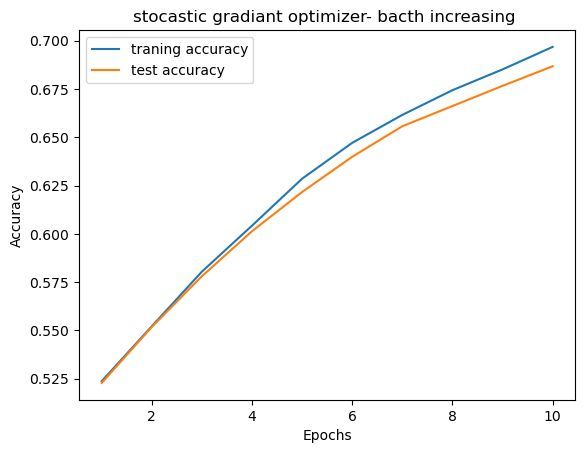

In [ ]:
epochs = range(1,11)

original_hist_acc = choose_hist.history['categorical_accuracy']
original_hist_val = choose_hist.history['val_categorical_accuracy']
plt.title('stocastic gradiant optimizer- bacth increasing ')
sns.lineplot(x=epochs, y=original_hist_acc, label='traning accuracy')
sns.lineplot(x=epochs, y=original_hist_val, label='test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Let change the loss fonction from  categorical crossentropy  to categorical hinge 

In [ ]:

choice_model_h = models.Sequential()
choice_model_h.add(layers.Dense(100, activation='relu', input_shape=(input_size,)))
choice_model_h.add(layers.Dense(75, activation='relu'))
choice_model_h.add(layers.Dense(2, activation='softmax'))

choice_model_h.compile(optimizer='sgd',
                       loss=losses.categorical_hinge,
                       metrics=[metrics.categorical_accuracy])
keras.utils.plot_model(choice_model_h, show_shapes=True, expand_nested=True,
    show_layer_activations=True,)
choose_hist_h = choice_model_h.fit(X_train_std, y_train_categorical,
                                   epochs=10,
                                   batch_size=16,
                                   validation_data=(X_test_std, y_test_categorical))


print("\n\n\n")

Epoch 1/10
489/489 [==============================] - 2s 3ms/step - loss: 0.7707 - categorical_accuracy: 0.6661 - val_loss: 0.5191 - val_categorical_accuracy: 0.7913
Epoch 2/10
489/489 [==============================] - 1s 3ms/step - loss: 0.4402 - categorical_accuracy: 0.8147 - val_loss: 0.4004 - val_categorical_accuracy: 0.8250
Epoch 3/10
489/489 [==============================] - 1s 3ms/step - loss: 0.3715 - categorical_accuracy: 0.8353 - val_loss: 0.3652 - val_categorical_accuracy: 0.8295
Epoch 4/10
489/489 [==============================] - 1s 2ms/step - loss: 0.3456 - categorical_accuracy: 0.8435 - val_loss: 0.3552 - val_categorical_accuracy: 0.8346
Epoch 5/10
489/489 [==============================] - 1s 2ms/step - loss: 0.3314 - categorical_accuracy: 0.8463 - val_loss: 0.3460 - val_categorical_accuracy: 0.8346
Epoch 6/10
489/489 [==============================] - 1s 3ms/step - loss: 0.3216 - categorical_accuracy: 0.8506 - val_loss: 0.3401 - val_categorical_accuracy: 0.8394
Epoc

In [ ]:
choose_hist_h.history

{'loss': [0.7706946730613708,
  0.440196692943573,
  0.37146493792533875,
  0.3455876410007477,
  0.3313816487789154,
  0.3215673267841339,
  0.3125956356525421,
  0.3066372871398926,
  0.30110377073287964,
  0.29517099261283875],
 'categorical_accuracy': [0.6660693883895874,
  0.8146678805351257,
  0.8352745175361633,
  0.84346604347229,
  0.8462818264961243,
  0.8506335616111755,
  0.8548572659492493,
  0.856137216091156,
  0.8584410548210144,
  0.8620248436927795],
 'val_loss': [0.5190858840942383,
  0.40037378668785095,
  0.36515530943870544,
  0.35519224405288696,
  0.3460453152656555,
  0.3401390016078949,
  0.33742836117744446,
  0.33391064405441284,
  0.3329927325248718,
  0.3313334286212921],
 'val_categorical_accuracy': [0.79128098487854,
  0.8250223994255066,
  0.8295013308525085,
  0.8345775008201599,
  0.8345775008201599,
  0.8393550515174866,
  0.8387578129768372,
  0.8390564322471619,
  0.8381606340408325,
  0.8381606340408325]}

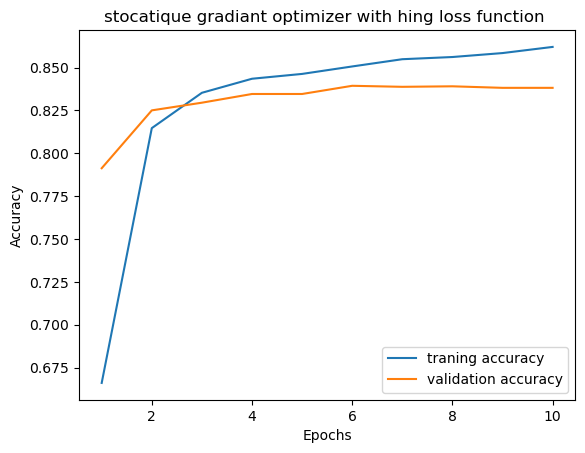

In [ ]:
epochs = range(1,11)

choice_hist_acc = choose_hist_h.history['categorical_accuracy']
choice_hist_val = choose_hist_h.history['val_categorical_accuracy']
plt.title('stocatique gradiant optimizer with hing loss function ')
sns.lineplot(x=epochs, y=choice_hist_acc, label='traning accuracy')
sns.lineplot(x=epochs, y=choice_hist_val, label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# L1 Regularization 

In [ ]:
regul_model = models.Sequential()
regul_model.add(layers.Dense(100,kernel_regularizer=regularizers.l1(0.01), activation='relu', input_shape=(input_size,)))
regul_model.add(layers.Dense(75,kernel_regularizer=regularizers.l1(0.001), activation='relu'))
regul_model.add(layers.Dense(2, activation='softmax'))

regul_model.compile(optimizer='sgd',
                       loss=losses.categorical_crossentropy,
                       metrics=[metrics.categorical_accuracy])
keras.utils.plot_model(regul_model, show_shapes=True, expand_nested=True,
    show_layer_activations=True,)
regul_hist = regul_model.fit(X_train_std, y_train_categorical,
                                   epochs=10,
                                   batch_size= 16,
                                   validation_data=(X_test_std, y_test_categorical))



Epoch 1/10
489/489 [==============================] - 2s 3ms/step - loss: 4.6800 - categorical_accuracy: 0.7150 - val_loss: 3.7097 - val_categorical_accuracy: 0.7883
Epoch 2/10
489/489 [==============================] - 1s 3ms/step - loss: 2.9627 - categorical_accuracy: 0.8127 - val_loss: 2.2917 - val_categorical_accuracy: 0.8229
Epoch 3/10
489/489 [==============================] - 1s 3ms/step - loss: 1.8166 - categorical_accuracy: 0.8300 - val_loss: 1.4264 - val_categorical_accuracy: 0.8289
Epoch 4/10
489/489 [==============================] - 1s 3ms/step - loss: 1.2110 - categorical_accuracy: 0.8273 - val_loss: 1.0718 - val_categorical_accuracy: 0.8229
Epoch 5/10
489/489 [==============================] - 1s 2ms/step - loss: 1.0373 - categorical_accuracy: 0.8259 - val_loss: 1.0059 - val_categorical_accuracy: 0.8268
Epoch 6/10
489/489 [==============================] - 1s 2ms/step - loss: 0.9923 - categorical_accuracy: 0.8272 - val_loss: 0.9822 - val_categorical_accuracy: 0.8146
Epoc

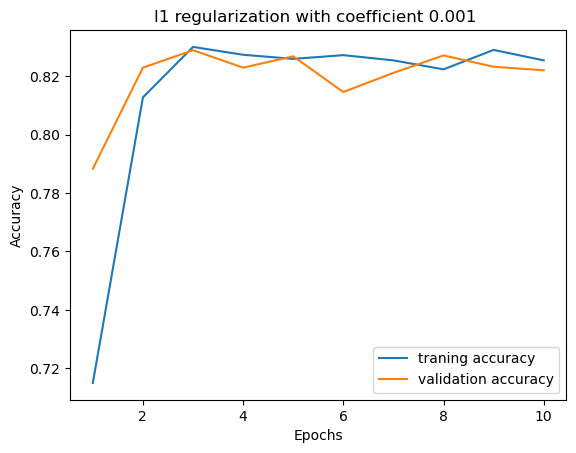

In [ ]:
epochs = range(1,11)

choice_hist_acc = regul_hist.history['categorical_accuracy']
choice_hist_val = regul_hist.history['val_categorical_accuracy']
plt.title('l1 regularization with coefficient 0.001 ')
sns.lineplot(x=epochs, y=choice_hist_acc, label='traning accuracy')
sns.lineplot(x=epochs, y=choice_hist_val, label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# L2 Regularization 

In [ ]:
regul2_model = models.Sequential()
regul2_model.add(layers.Dense(100,kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(input_size,)))
regul2_model.add(layers.Dense(75,kernel_regularizer=regularizers.l2(0.001), activation='relu'))
regul2_model.add(layers.Dense(2, activation='softmax'))

regul2_model.compile(optimizer='sgd',
                       loss=losses.categorical_hinge,
                       metrics=[metrics.categorical_crossentropy])
keras.utils.plot_model(regul2_model, show_shapes=True, expand_nested=True,
    show_layer_activations=True,)
regul2_hist = regul2_model.fit(X_train_std, y_train_categorical,
                                   epochs=10,
                                   batch_size=16,
                                   validation_data=(X_test_std, y_test_categorical))


Epoch 1/10
489/489 [==============================] - 2s 3ms/step - loss: 0.8430 - categorical_crossentropy: 0.5597 - val_loss: 0.6472 - val_categorical_crossentropy: 0.4916
Epoch 2/10
489/489 [==============================] - 1s 2ms/step - loss: 0.5862 - categorical_crossentropy: 0.5170 - val_loss: 0.5508 - val_categorical_crossentropy: 0.5419
Epoch 3/10
489/489 [==============================] - 1s 3ms/step - loss: 0.5227 - categorical_crossentropy: 0.5833 - val_loss: 0.5180 - val_categorical_crossentropy: 0.6068
Epoch 4/10
489/489 [==============================] - 1s 3ms/step - loss: 0.4949 - categorical_crossentropy: 0.6470 - val_loss: 0.5033 - val_categorical_crossentropy: 0.6775
Epoch 5/10
489/489 [==============================] - 1s 3ms/step - loss: 0.4774 - categorical_crossentropy: 0.6976 - val_loss: 0.4935 - val_categorical_crossentropy: 0.7480
Epoch 6/10
489/489 [==============================] - 1s 2ms/step - loss: 0.4640 - categorical_crossentropy: 0.7438 - val_loss: 0.

In [ ]:
regul2_hist.history.keys()

dict_keys(['loss', 'categorical_crossentropy', 'val_loss', 'val_categorical_crossentropy'])

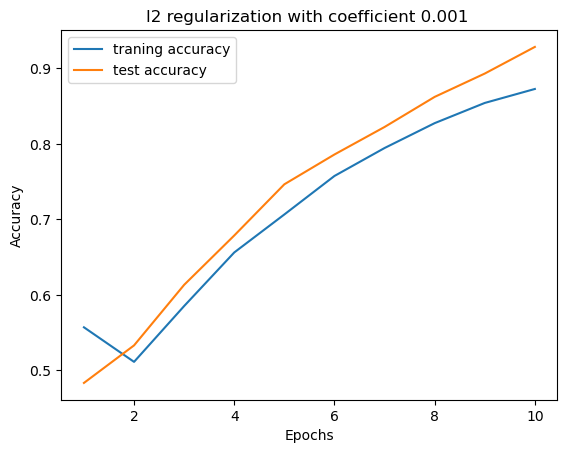

In [ ]:
epochs = range(1,11)

choice_hist_acc = regul2_hist.history['categorical_crossentropy']
choice_hist_val = regul2_hist.history['val_categorical_crossentropy']
plt.title('l2 regularization with coefficient 0.001 ')
sns.lineplot(x=epochs, y=choice_hist_acc, label='traning accuracy')
sns.lineplot(x=epochs, y=choice_hist_val, label='test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# L1-L2 regularization

In [ ]:
l12_model = models.Sequential()
l12_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                          activation='relu', input_shape=(50,)))
l12_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                          activation='relu'))
l12_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
regul2l1_model = models.Sequential()
regul2l1_model.add(layers.Dense(100,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu', input_shape=(input_size,)))
regul2l1_model.add(layers.Dense(75,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
regul2l1_model.add(layers.Dense(2, activation='softmax'))

regul2l1_model.compile(optimizer='sgd',
                       loss=losses.categorical_hinge,
                       metrics=[metrics.categorical_crossentropy])
keras.utils.plot_model(regul2l1_model, show_shapes=True, expand_nested=True,
    show_layer_activations=True,)
regul2l1_hist = regul2l1_model.fit(X_train_std, y_train_categorical,
                                   epochs=10,
                                   batch_size=16,
                                   validation_data=(X_test_std, y_test_categorical))

Epoch 1/10
489/489 [==============================] - 2s 3ms/step - loss: 1.9618 - categorical_crossentropy: 0.5720 - val_loss: 1.7382 - val_categorical_crossentropy: 0.5010
Epoch 2/10
489/489 [==============================] - 1s 3ms/step - loss: 1.6273 - categorical_crossentropy: 0.5110 - val_loss: 1.5483 - val_categorical_crossentropy: 0.5187
Epoch 3/10
489/489 [==============================] - 1s 3ms/step - loss: 1.4856 - categorical_crossentropy: 0.5662 - val_loss: 1.4449 - val_categorical_crossentropy: 0.5805
Epoch 4/10
489/489 [==============================] - 1s 3ms/step - loss: 1.3912 - categorical_crossentropy: 0.6120 - val_loss: 1.3622 - val_categorical_crossentropy: 0.6222
Epoch 5/10
489/489 [==============================] - 1s 3ms/step - loss: 1.3110 - categorical_crossentropy: 0.6551 - val_loss: 1.2937 - val_categorical_crossentropy: 0.6772
Epoch 6/10
489/489 [==============================] - 1s 3ms/step - loss: 1.2387 - categorical_crossentropy: 0.6794 - val_loss: 1.

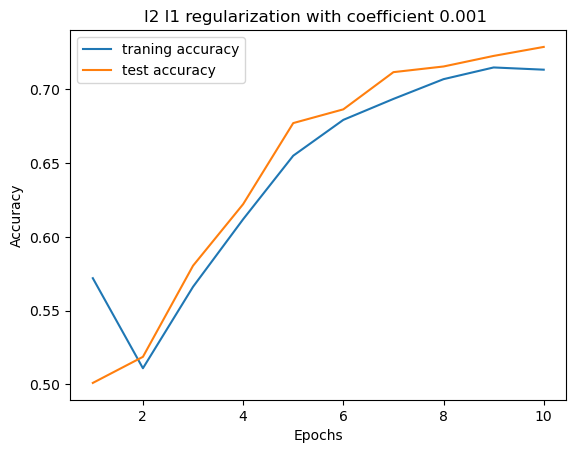

In [ ]:
epochs = range(1,11)

choice_hist_acc = regul2l1_hist.history['categorical_crossentropy']
choice_hist_val = regul2l1_hist.history['val_categorical_crossentropy']
plt.title('l2 l1 regularization with coefficient 0.001 ')
sns.lineplot(x=epochs, y=choice_hist_acc, label='traning accuracy')
sns.lineplot(x=epochs, y=choice_hist_val, label='test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#### number of nodes

#  Dropout model

In [ ]:

choice_model = models.Sequential()
choice_model.add(layers.Dense(100, activation='relu', input_shape=(input_size,)))
choice_model.add(Dropout(0.1))
choice_model.add(layers.Dense(75, activation='relu'))
choice_model.add(Dropout(0.1))
choice_model.add(layers.Dense(2, activation='softmax'))

choice_model.compile(optimizer='sgd',
                       loss=losses.categorical_crossentropy,
                       metrics=[metrics.categorical_accuracy])
keras.utils.plot_model(choice_model, show_shapes=True, expand_nested=True,
    show_layer_activations=True,)
choose_hist = choice_model.fit(X_train_std, y_train_categorical,
                                   epochs=10,
                                   batch_size=16,
                                   validation_data=(X_test_std, y_test_categorical))


Epoch 1/10
489/489 [==============================] - 2s 3ms/step - loss: 0.5807 - categorical_accuracy: 0.6919 - val_loss: 0.4663 - val_categorical_accuracy: 0.7844
Epoch 2/10
489/489 [==============================] - 1s 3ms/step - loss: 0.4580 - categorical_accuracy: 0.7948 - val_loss: 0.4092 - val_categorical_accuracy: 0.8214
Epoch 3/10
489/489 [==============================] - 1s 3ms/step - loss: 0.4253 - categorical_accuracy: 0.8171 - val_loss: 0.3917 - val_categorical_accuracy: 0.8262
Epoch 4/10
489/489 [==============================] - 1s 2ms/step - loss: 0.4051 - categorical_accuracy: 0.8226 - val_loss: 0.3829 - val_categorical_accuracy: 0.8316
Epoch 5/10
489/489 [==============================] - 1s 3ms/step - loss: 0.3967 - categorical_accuracy: 0.8284 - val_loss: 0.3803 - val_categorical_accuracy: 0.8340
Epoch 6/10
489/489 [==============================] - 1s 3ms/step - loss: 0.3843 - categorical_accuracy: 0.8354 - val_loss: 0.3711 - val_categorical_accuracy: 0.8391
Epoc

In [ ]:
score =choice_model.evaluate(X_test_std, y_test_categorical, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3603857755661011
Test accuracy: 0.8429381847381592


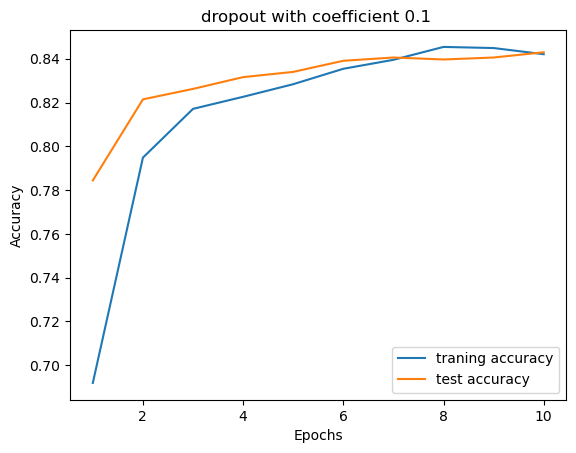

In [ ]:
epochs = range(1,11)

choice_hist_acc = choose_hist.history['categorical_accuracy']
choice_hist_val = choose_hist.history['val_categorical_accuracy']
plt.title('dropout with coefficient 0.1 ')
sns.lineplot(x=epochs, y=choice_hist_acc, label='traning accuracy')
sns.lineplot(x=epochs, y=choice_hist_val, label='test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()